In [35]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from bs4 import BeautifulSoup
import time

# Path to the WebDriver(in my device)
driver_path = "D://Big Downloads//edgedriver_win64//msedgedriver.exe"
service = Service(executable_path=driver_path)

# Initialize the WebDriver
driver = webdriver.Edge(service=service)

# Opening the URL
url = "https://results.eci.gov.in/"
driver.get(url)

time.sleep(10)  

# Get page source and parse with BeautifulSoup
page_content = driver.page_source
soup = BeautifulSoup(page_content, 'html.parser')

# Find the links to specific result pages
links = soup.find_all('a', href=True)
result_links = [link['href'] for link in links if 'PcResultGenJune2024' in link['href']]

# for debugging
print(result_links)

# Close the WebDriver
driver.quit()


import csv

# Function to scrape data from a result page
def scrape_result_page(url):
    driver = webdriver.Edge(service=service)
    driver.get(url)
    time.sleep(10)
    
    page_content = driver.page_source
    soup = BeautifulSoup(page_content, 'html.parser')
    
    results_table = soup.find('table')  # Adjust selector as needed
    if results_table:
        rows = results_table.find_all('tr')
        data = []
        for row in rows[1:]:  # Skip header row
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            data.append(cols)
        driver.quit()
        return data
    else:
        driver.quit()
        print(f"Table not found on page: {url}")
        return []

# Scrape data from all result pages and save to CSV
all_data = []
for link in result_links:
    full_url = link
    all_data.extend(scrape_result_page(full_url))

# Write data to CSV
with open('election_results.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Column1', 'Column2', 'Column3'])  # Adjust column headers as needed
    writer.writerows(all_data)


['https://results.eci.gov.in/PcResultGenJune2024/index.htm']


C:\Users\Nagasai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nagasai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


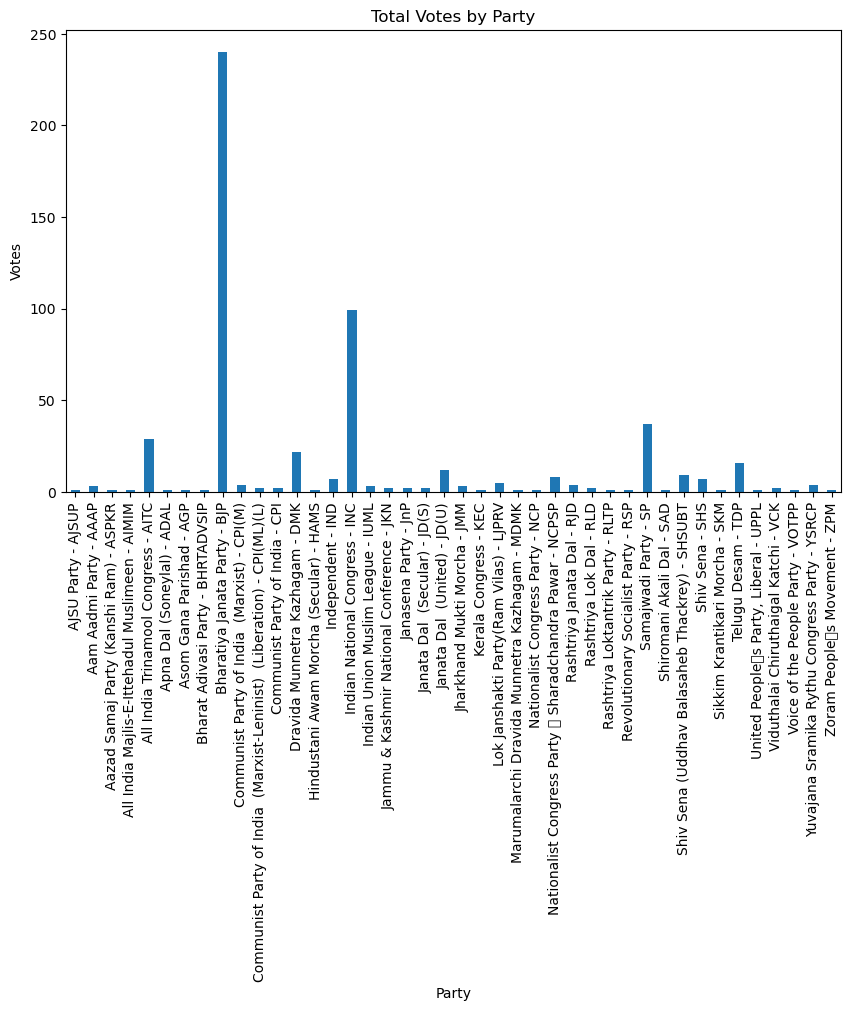

C:\Users\Nagasai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Nagasai\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


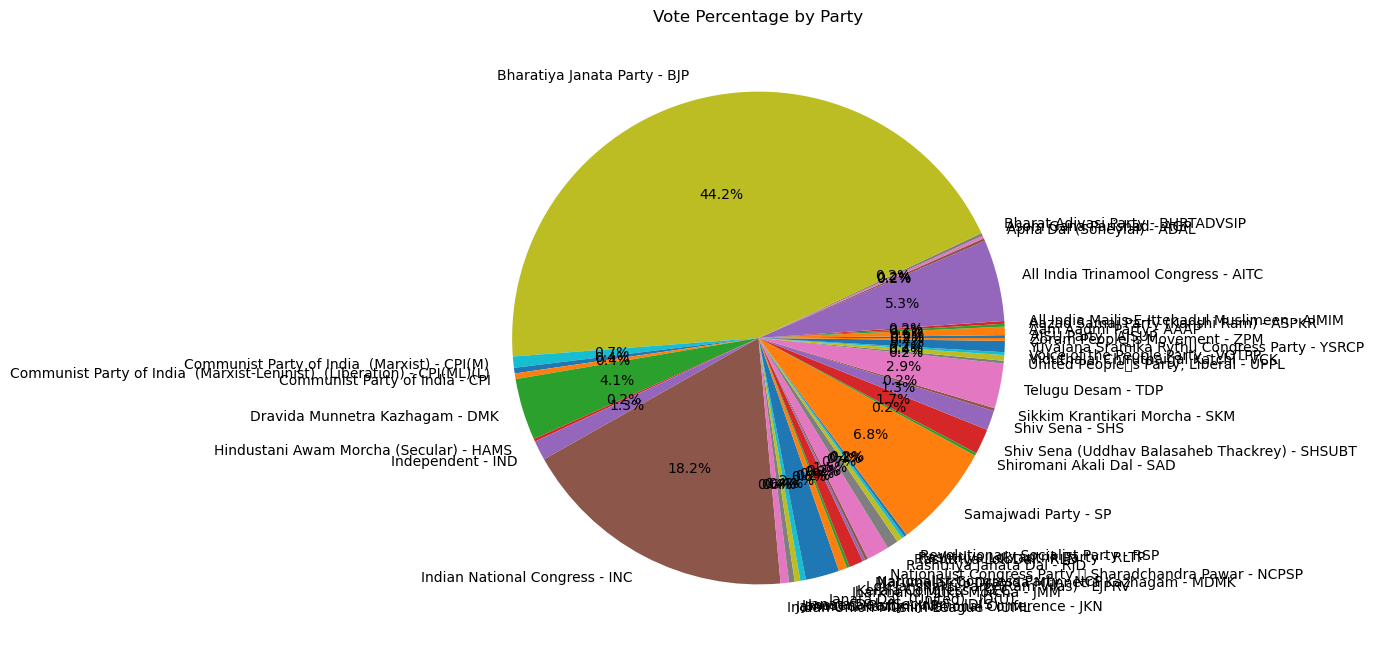

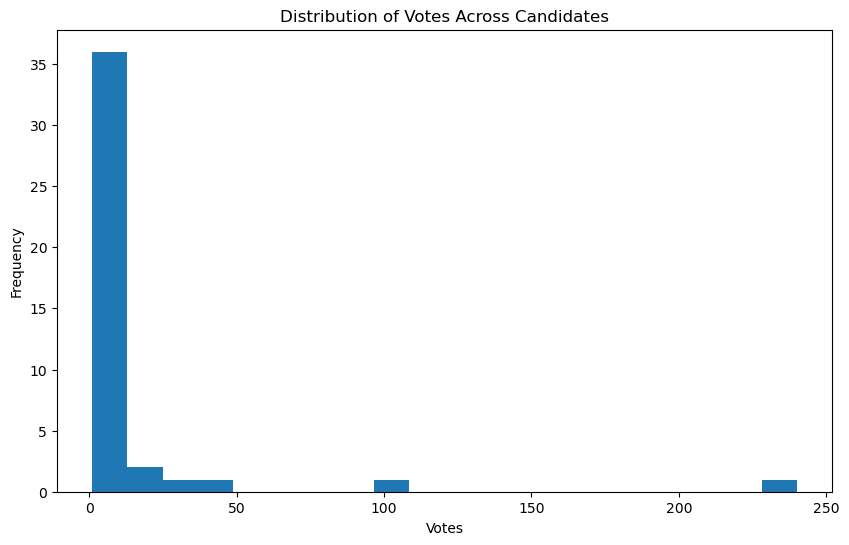

IndexError: index 0 is out of bounds for axis 0 with size 0

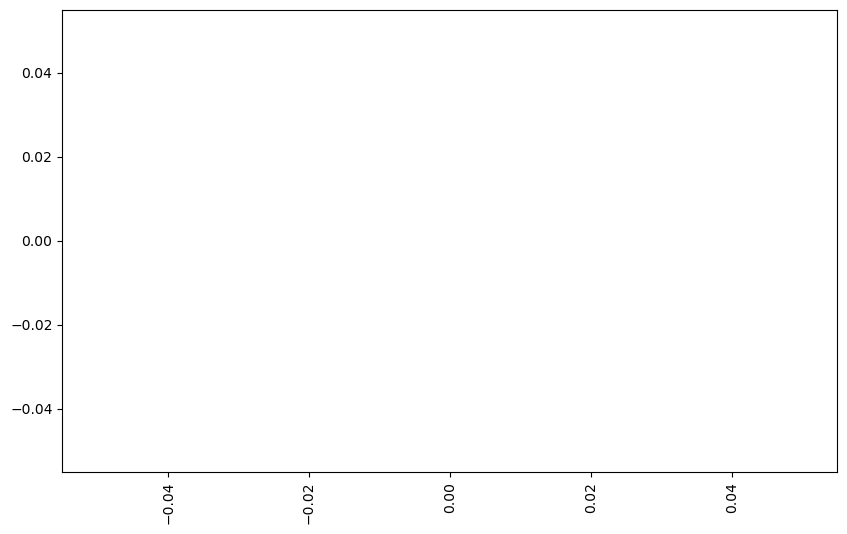

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'election_results.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Add a new column for states
party_to_state = {
    'Bharatiya Janata Party': 'Chhattisgarh, Madhya Pradesh, Rajasthan',
    'Indian National Congress': 'Telangana'
}
df['State'] = df['Party'].map(party_to_state)

# 1. Bar Chart: Votes by Party
plt.figure(figsize=(10, 6))
df.groupby('Party')['Votes'].sum().plot(kind='bar')
plt.title('Total Votes by Party')
plt.xlabel('Party')
plt.ylabel('Votes')
plt.show()

# 2. Pie Chart: Vote Percentage by Party
plt.figure(figsize=(8, 8))
df.groupby('Party')['Votes'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Vote Percentage by Party')
plt.ylabel('')
plt.show()

# Additional visualizations can be added similarly...

# Drawing Insights
# Insight 1: Total votes received by each party
total_votes_by_party = df.groupby('Party')['Votes'].sum()

# Insight 2: Percentage of votes received by each party
vote_percentage_by_party = df.groupby('Party')['Votes'].sum() / df['Votes'].sum() * 100

# Insight 3: Average votes per candidate in each party
average_votes_per_candidate = df.groupby('Party')['Votes'].mean()

# Insight 4: States where each party received votes
states_by_party = df.groupby('Party')['State'].unique()

# Insight 5: Top candidate by votes
top_candidate = df.loc[df['Votes'].idxmax()]

# Insight 6: Distribution of votes across candidates
plt.figure(figsize=(10, 6))
df['Votes'].plot(kind='hist', bins=20)
plt.title('Distribution of Votes Across Candidates')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.show()

# Insight 7: Votes received in each state (if state-wise data is available)
# Assuming there is a 'State' column with actual state data
votes_by_state = df.groupby('State')['Votes'].sum()

# Insight 8: Number of candidates per party
candidates_per_party = df['Party'].value_counts()

# Insight 9: Votes distribution by state
plt.figure(figsize=(10, 6))
df.groupby('State')['Votes'].sum().plot(kind='bar')
plt.title('Total Votes by State')
plt.xlabel('State')
plt.ylabel('Votes')
plt.show()

# Insight 10: Correlation between votes and another variable (e.g., age if available)
# Assuming there is an 'Age' column
# correlation = df['Votes'].corr(df['Age'])

# Print the insights
print("Total votes by party:\n", total_votes_by_party)
print("Vote percentage by party:\n", vote_percentage_by_party)
print("Average votes per candidate:\n", average_votes_per_candidate)
print("States by party:\n", states_by_party)
print("Top candidate:\n", top_candidate)
print("Votes by state:\n", votes_by_state)
print("Number of candidates per party:\n", candidates_per_party)
